In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.ndimage as ndi
import seaborn as sns
import pyfftw
import pyfftw.interfaces.numpy_fft as fft
from pyem import star
from pyem import mrc
from pyem import geom
from pyem import vop
from pyem import ctf
from skimage import io
from PIL import Image
sns.set()
%matplotlib inline


In [2]:
plt.style.use('science')

In [3]:
def read_norm(file):
    im = Image.open(file)
    im = np.array(im)

    # im = Image.fromarray(im[1916:1916+160,1930:1930+160].astype(np.uint8))
    # im.save(file[0:-4]+'_cut.tif')
    return im



def nxcor(img,template):

    # img = imarrayt
    imgf = fft.rfft2(fft.fftshift(img))
    tpad = np.pad(template,
                [(img.shape[0] - template.shape[0]) // 2,
                (img.shape[1] - template.shape[1]) // 2],
                mode='constant')
    # print(tpad.shape,imgf.shape)
    tpadf = fft.rfft2(fft.fftshift(tpad))
    nxcor = fft.fftshift(fft.irfft2( imgf * tpadf.conj() /
                                (np.abs(imgf) * np.abs(tpadf)) ))

    return np.unravel_index(np.argmax(nxcor), nxcor.shape)



def filter_(imarray,size_f):
    imarray_f = fft.fftshift(fft.fft2(imarray))
    imarray_f_show = np.log(np.abs(imarray_f))

    l = imarray_f.shape[0]
    filter_x = np.linspace(-1,1,l)
    filter_xx,filter_yy = np.meshgrid(filter_x,filter_x)

    filter_ = filter_xx**2+ filter_yy**2
    filter_[filter_>=size_f**2] = 0
    filter_[filter_ != 0] =1


    imarray_f_filter = imarray_f * filter_
    imarray_filter = fft.irfft2(fft.fftshift(imarray_f_filter)[:,0:l//2+1])

    return imarray_filter

In [4]:

file_exp1 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p3_0min.tif'
file_exp2 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p3_1min.tif'
file_exp3 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p3_2min.tif'
file_exp4 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p3_3min.tif'

file_cool_1 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p3_4.tif'
file_cool_2= '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p3_5.tif'
file_cool_3 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p3_6.tif'
file_cool_4 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p3_7.tif'
file_cool_5 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p3_8.tif'


name_list = [file_exp1,file_exp2,file_exp4,file_cool_1,file_cool_2,file_cool_3,file_cool_4,file_cool_5]

im_array_list = []

for name in name_list:
    imt = read_norm(name)
    # print(imt.shape)
    im_array_list.append(imt)

In [5]:
template = im_array_list[0][2400:2550,2050:2200]

num = 0
images_new = np.zeros([16,4096,4096])
images_new2 = np.zeros([16,400,400])
aver_per = []
for im in im_array_list:
    aver_per.append(np.mean(im))
    move = nxcor(im,template)
    # print(move)
    x = move[0]-2033
    y = move[1]-2125

    # print(x,y,num)
    images_new[num,0:4096-x,0:4096-y] = im[x:,y:]
    im = Image.fromarray(images_new[num,2360:2760,1410:1810].astype(np.uint8))
    im.save('//Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/cut/'+str(num)+'_cut.tif')
    images_new2[num,:,:] = im
    num = num+1 

In [6]:
# import numpy as np
# from scipy import ndimage as ndi
# from matplotlib import pyplot as plt
# import matplotlib.cm as cm

# from skimage import data
# from skimage import color
# from skimage.util import view_as_blocks

# def filt_med(l):
#     # 采样块大小
#     block_shape = (4, 4)

#     # 将宇航员这张图像转换为矩阵块
#     view = view_as_blocks(l, block_shape)
#     print(view.shape)
#     flatten_view = view.reshape(view.shape[0], view.shape[1], -1)
#     # print(flatten_view.shape) # output：(128,128,16)

#     # 使用均值、最大值、中位值采样后形成的图像
#     mean_view = np.mean(flatten_view, axis=2)
#     # print(mean_view.shape) # output：(128,128)
#     # max_view = np.max(flatten_view, axis=2)
#     # median_view = np.median(flatten_view, axis=2)

#     return median_view

In [7]:
# te = []
# num = 0
# for im_n in images_new2:
#     d = 0.5*(np.mean(im_n[0:50,0:50])+np.mean(im_n[350:,350:]))
#     te.append(np.mean(im_n[150:250,150:250]-d))
#     num = num+1

In [8]:
# plt.plot(te)

# 第二套点p4

In [9]:
file_exp1 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p4_0.tif'
file_exp2 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p4_1.tif'


file_cool_1 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p4_2cool.tif'
file_cool_2 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p4_3cool.tif'
file_cool_3 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p4_4cool.tif'
file_cool_4 = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/GVPP_#2_em_p4_5cool.tif'



name_list_p4 = [file_exp2,file_cool_1,file_cool_2,file_cool_3,file_cool_4]

im_array_list_p4 = []

for name in name_list_p4:
    imt = read_norm(name)
    # print(imt.shape)
    im_array_list_p4.append(imt)


In [10]:
template = im_array_list_p4[0][2023:2223,1094:1294]

num = 0
images_new_p4 = np.zeros([5,4096,4096])
images_new2_p4 = np.zeros([5,400,400])
aver_per_p4 = []
for im in im_array_list_p4:
    aver_per_p4.append(np.mean(im))
    move = nxcor(im,template)
    # print(move)
    x = move[0]-2123
    y = move[1]-1194

    # print(x,y,num)
    images_new_p4[num,0:4096-x,0:4096-y] = im[x:,y:]
    im = Image.fromarray(images_new_p4[num,2360:2760,1410:1810].astype(np.uint8))
    im.save('//Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/cut/'+'A'+str(num)+'_cut.tif')
    images_new2_p4[num,:,:] = im
    num = num+1 



In [11]:
# te2 = []
# te2.append(0)
# num = 0
# for im_n in images_new2_p4:
#     d = 0.5*(np.mean(im_n[0:50,0:50])+np.mean(im_n[350:,350:]))
#     te2.append(np.mean(im_n[150:250,150:250]-d))

# plt.plot(te2)


In [12]:
plt.imshow(images_new_p4[3][2440:2840,550:950])
num = 0
for im in images_new_p4:
    im = Image.fromarray(im[2420:2820,550:950].astype(np.uint8))
    im.save('//Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/cut/'+str(num+9)+'_cut.tif')
    images_new2[num+8,:,:] = im
    num = num+1

RuntimeError: Failed to process string with tex because latex could not be found

In [ ]:
# te = []
# num = 0

# for im_n in images_new2:
#     d = 0.5*(np.mean(im_n[0:50,0:50])+np.mean(im_n[350:,350:]))
#     te.append(np.mean(im_n[150:250,150:250]-d))
#     num = num+1

# plt.plot(te)

# 第一套点

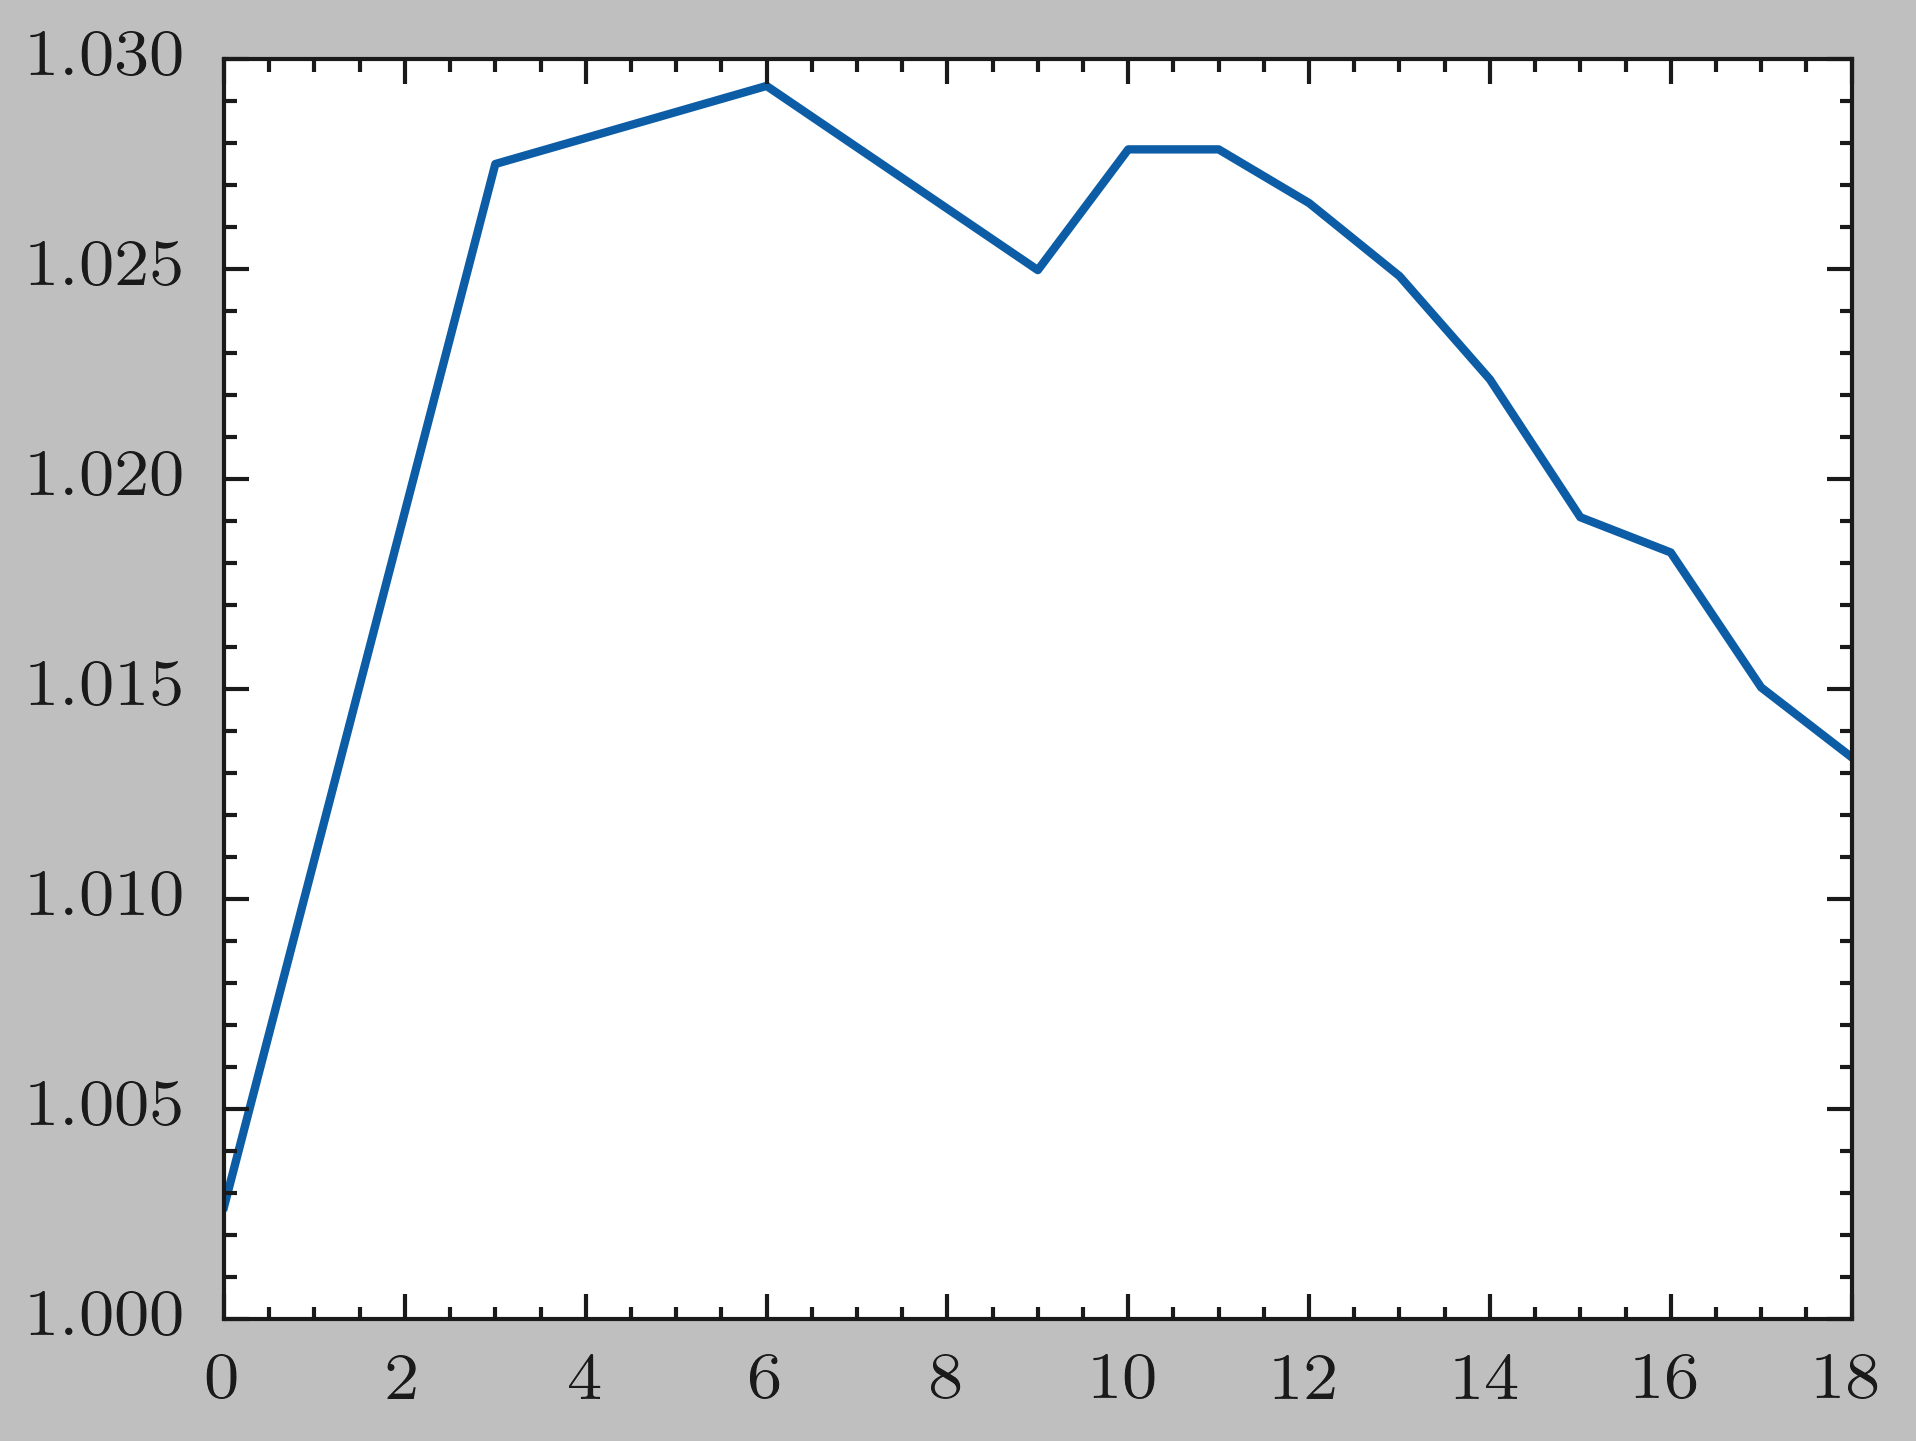

In [48]:
mask_fil = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/cut/mask17.tif'
mask_ = Image.open(mask_fil)
mask =  np.array(mask_)
mask[mask < 255] = 0
mask[mask >= 255] = 1
# plt.imshow(mask)

mask2 = mask.copy()
s2 = np.sum(mask2)
mask1 = 1 - mask.copy()
s1 = np.sum(mask1)

res1 = []
res2 = []
res = []

# res.append(1)
for im in images_new2[0:8]:
    r1 = np.sum(im*mask1)/s1
    res1.append(r1)

    r2 = np.sum(im*mask2)/s2
    res2.append(r2)

    res.append((r1/r2))

# t = [0,5,10,15,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
# # plt.plot(res)

# print(res1)
# print(res2)

mask_fil = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/cut/mask913.tif'
mask_ = Image.open(mask_fil)
mask =  np.array(mask_)
mask[mask < 255] = 0
mask[mask >= 255] = 1

mask2 = mask.copy()
s2 = np.sum(mask2)
mask1 = 1 - mask.copy()
s1 = np.sum(mask1)



# res.append(1)
for im in images_new2[8:]:
    r1 = np.sum(im*mask1)/s1
    res1.append(r1)

    r2 = np.sum(im*mask2)/s2
    res2.append(r2)

    res.append((r1/r2))

t = [0,3,6,9,10,11,12,13,14,15,16,17,18,19,20,21]

plt.plot(t,res)




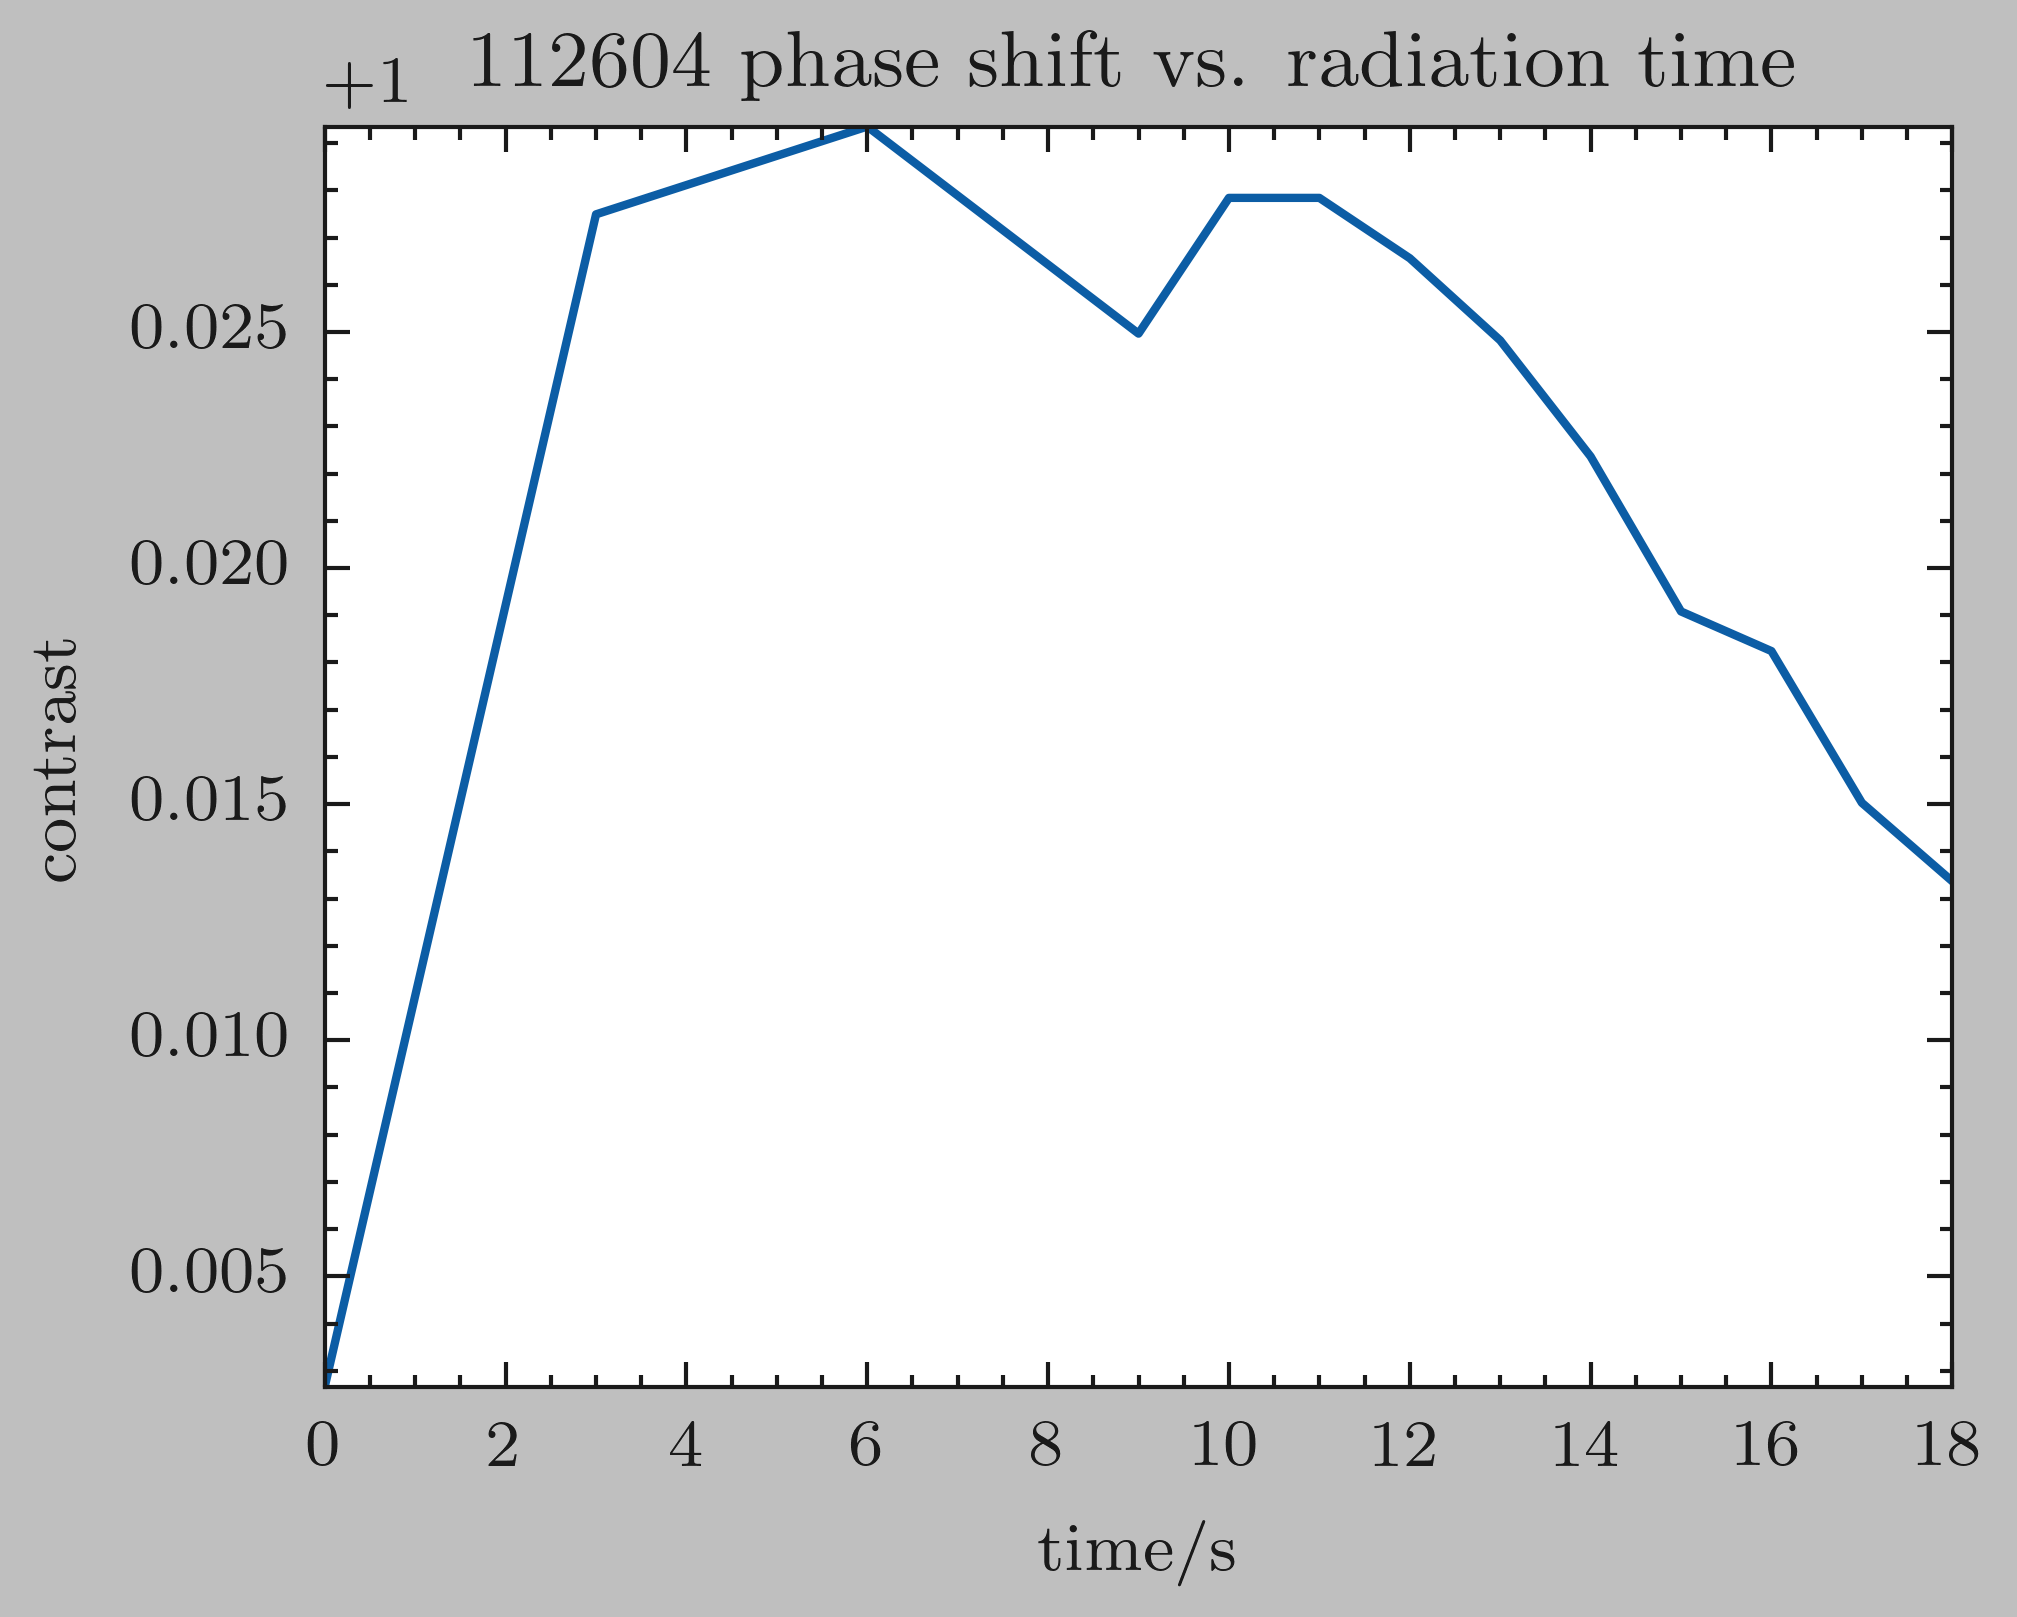

In [63]:
plt.style.use('science')  
plt.plot(t, res)  
# ax.plot(t, res, label='1126_P3')   
plt.xlabel(u"time/s")# plots an axis lable
plt.ylabel(u"contrast")      
# plt.legend((u"p3"),loc='best')      
plt.autoscale(tight=True) 
plt.title(u"112604 phase shift vs. radiation time")        
plt.savefig('fig1.jpg', dpi=300,transparent = True)


In [23]:
styles = plt.style.available
print(styles)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'bright', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'grid', 'high-contrast', 'high-vis', 'ieee', 'light', 'muted', 'no-latex', 'notebook', 'pgf', 'retro', 'scatter', 'science', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'std-colors', 'tableau-colorblind10', 'vibrant']


# 第二套

In [19]:
mask_fil = '/Users/yifeichen/Desktop/data_1109/20201126_yangzi_G/cut/maska.tif'
mask_ = Image.open(mask_fil)
mask =  np.array(mask_)
mask[mask < 255] = 0
mask[mask >= 255] = 1
# plt.imshow(mask)

mask2 = mask.copy()
s2 = np.sum(mask2)
mask1 = 1 - mask.copy()
s1 = np.sum(mask1)

res_p4 = []
res_p4.append(1)
for im in images_new2_p4:
    r1 = np.sum(im*mask1)/s1
    # res1.append(r1)

    r2 = np.sum(im*mask2)/s2
    # res2.append(r2)

    res_p4.append((r1/r2))

# t = [0,5,10,15,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
t_p4 = [0,2,3,4,5,6]



NameError: name 'images_new2_p4' is not defined

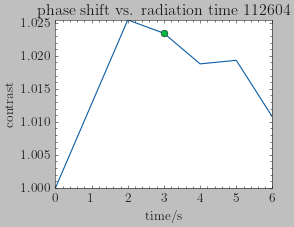

In [85]:
plt.style.use('science')  
plt.plot(t_p4,res_p4) 
plt.plot(t_p4[2],res_p4[2],'o')
# ax.plot(t, res, label='1126_P3')   
plt.xlabel(u"time/s")# plots an axis lable
plt.ylabel(u"contrast")      
# plt.legend((u"p3"),loc='best')      
plt.autoscale(tight=True) 
plt.title(u"phase shift vs. radiation time 112604 ")        
plt.savefig('fig2.jpg', dpi=300,transparent = True)

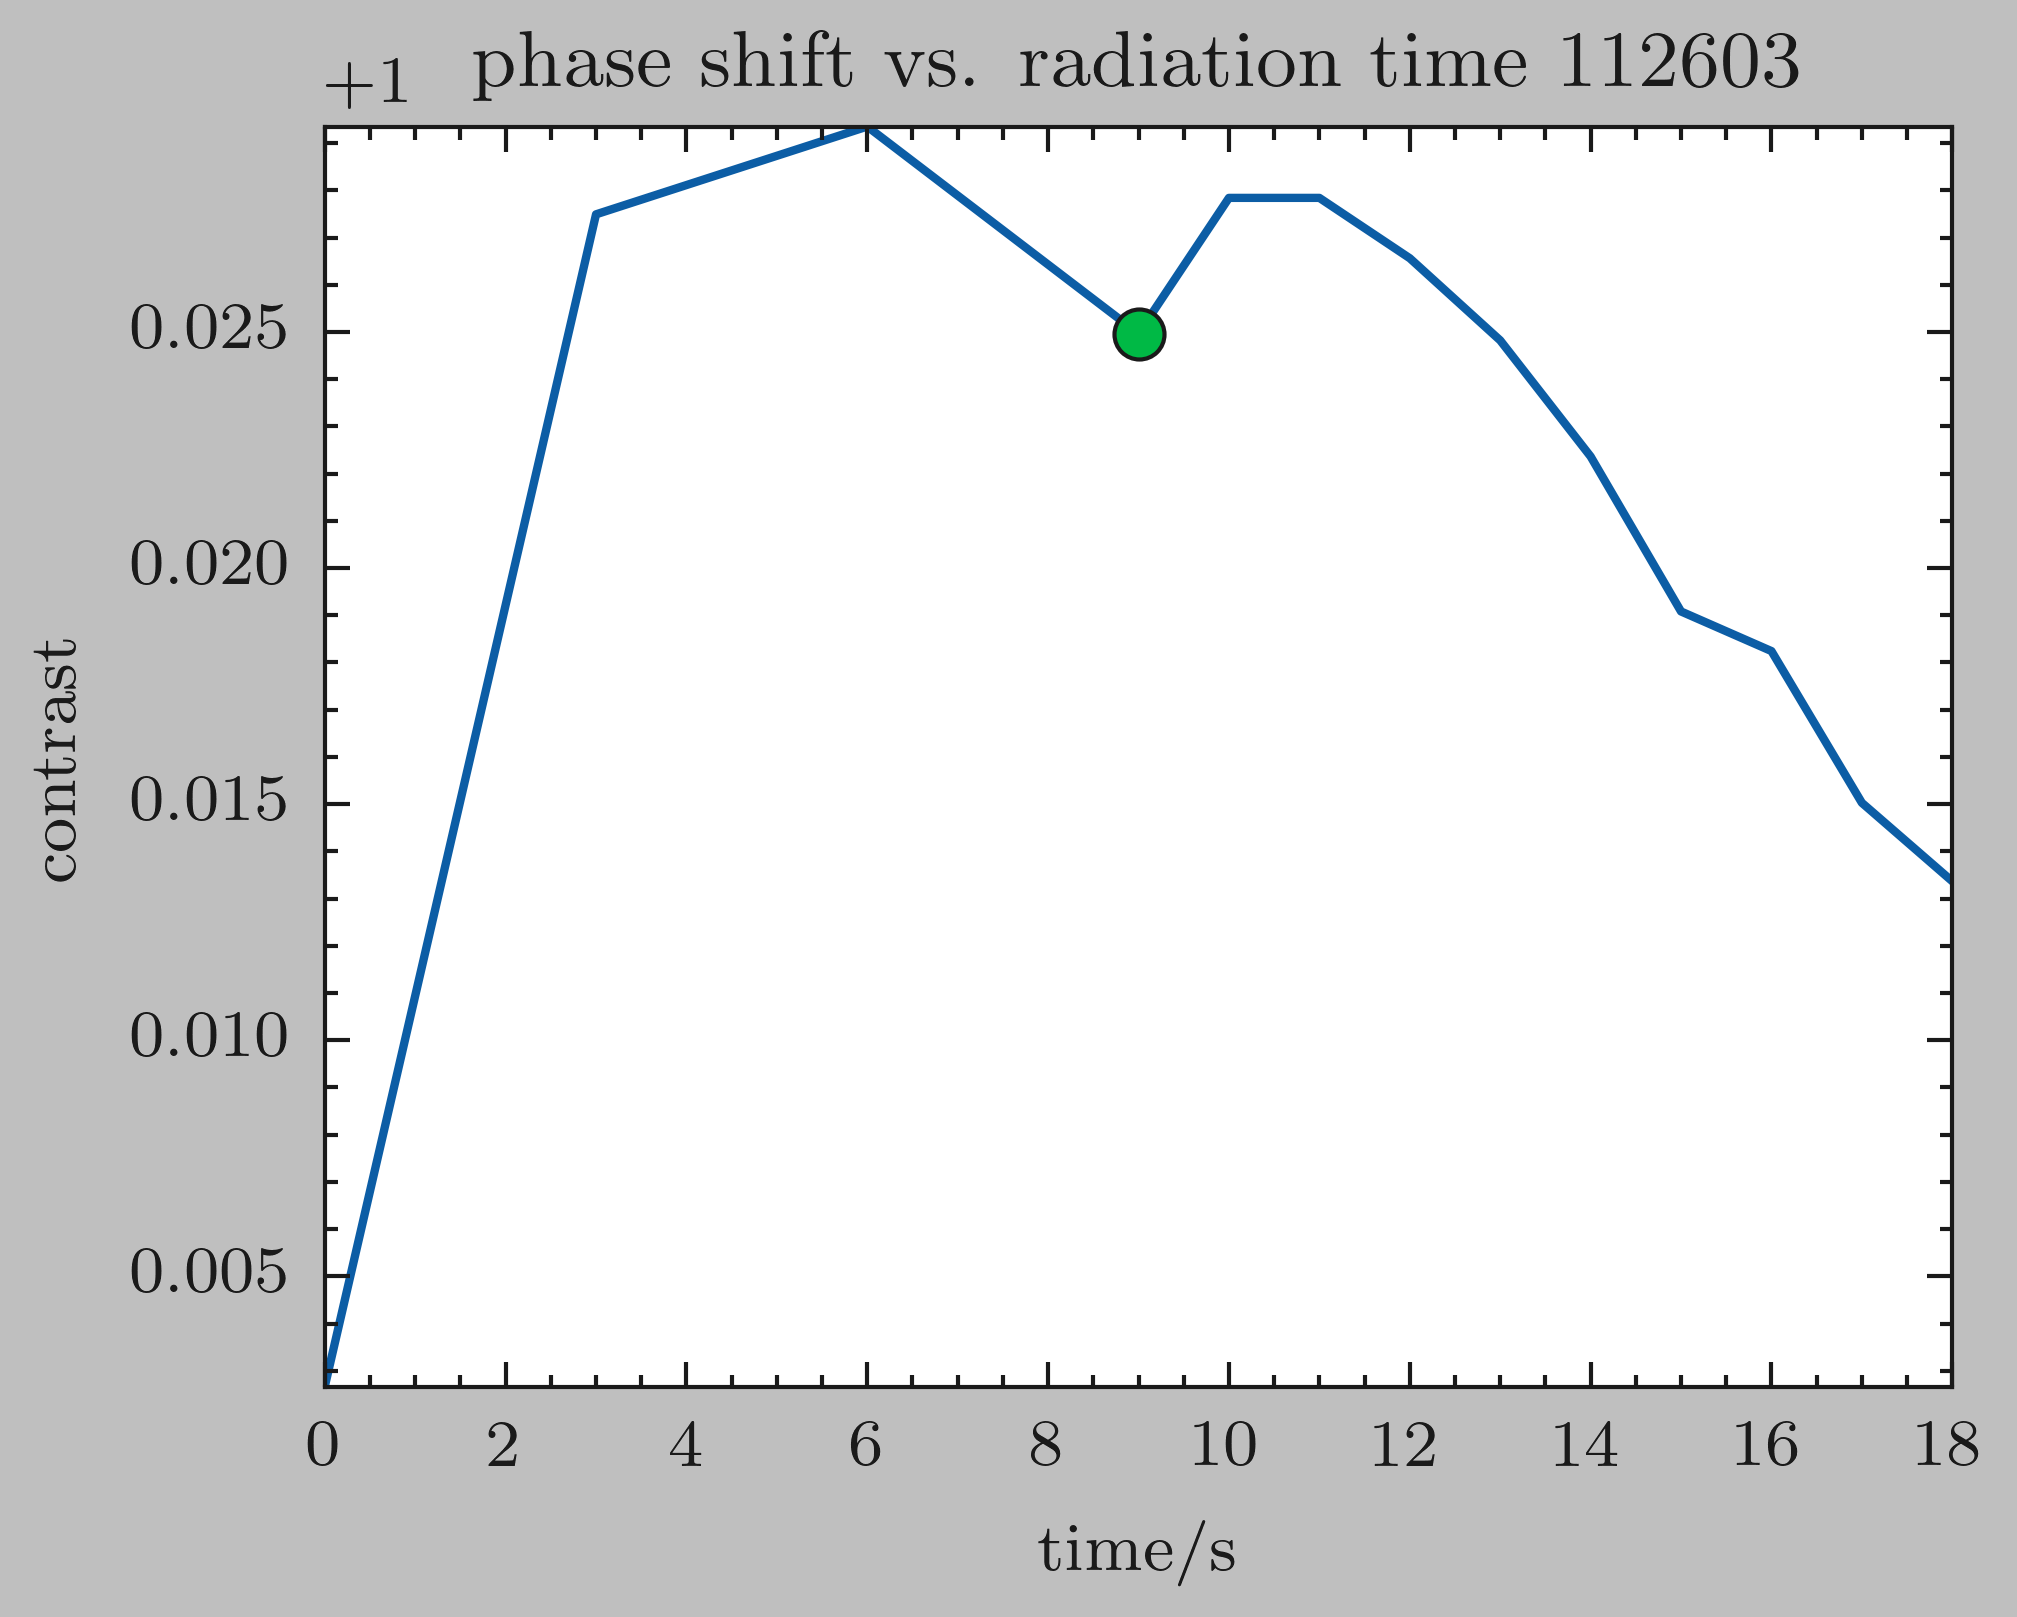

In [79]:
plt.style.use('science')  
plt.plot(t,res) 
plt.plot(t[3],res[3],'o')
# ax.plot(t, res, label='1126_P3')   
plt.xlabel(u"time/s")# plots an axis lable
plt.ylabel(u"contrast")      
# plt.legend((u"p3"),loc='best')      
plt.autoscale(tight=True) 
plt.title(u"phase shift vs. radiation time 112603 ")        
plt.savefig('fig1.jpg', dpi=300,transparent = True)

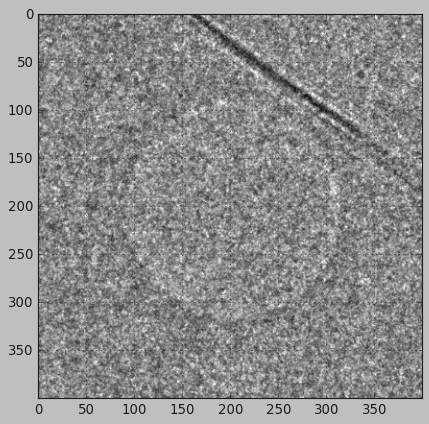

In [84]:
plt.imshow(images_new2[2],'gray')
plt.grid(None)